In [1]:
from google.colab import drive
drive.mount("/content/drive")
#veri dosyalarını eklemek için link

Mounted at /content/drive


In [2]:
from google.colab import files
uploaded=files.upload()
#dosyaları eklemek için

Saving test.csv to test.csv
Saving train.csv to train.csv


In [33]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
test=pn.read_csv('test.csv')
train=pn.read_csv('train.csv')

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df = train.append(test, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [18]:
# Embarked değişkenindeki 2 tane boşluğu değişkenin modu ile doldurdum.
df['Embarked'].fillna('S',inplace=True)

In [28]:
# Fare değişkenindeki 1 tane boşluğu değişkenin medyanı ile doldurdum.
df['Fare'].fillna(df.Fare.median(),inplace=True)

In [32]:
# kabini belli olmayanlara N dedim.
df['Cabin'].fillna('N',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


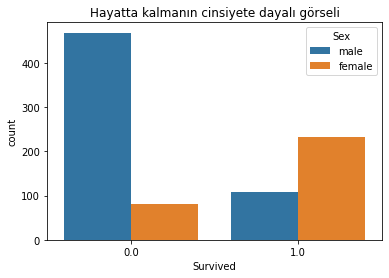

In [40]:
plt.title('Hayatta kalmanın cinsiyete dayalı görseli')
sns.countplot(df['Survived'],hue=df['Sex'])

Text(0.5, 1.0, 'Ödenen ücrete dayalı hayatta kalmanın görseli')

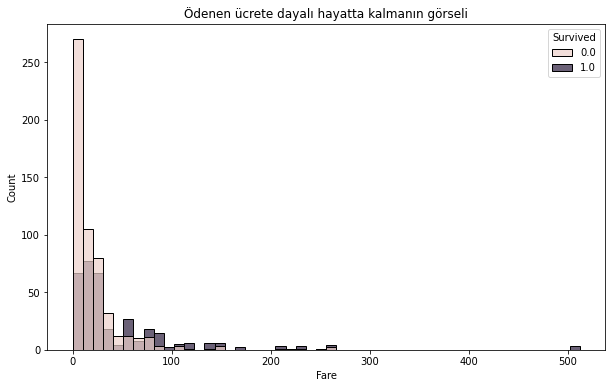

In [88]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['Fare'],hue=df['Survived'],bins =50, alpha = .7)
plt.title('Ödenen ücrete dayalı hayatta kalmanın görseli')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Yolcunun geldiği yere göre yaşam durumu görseli')

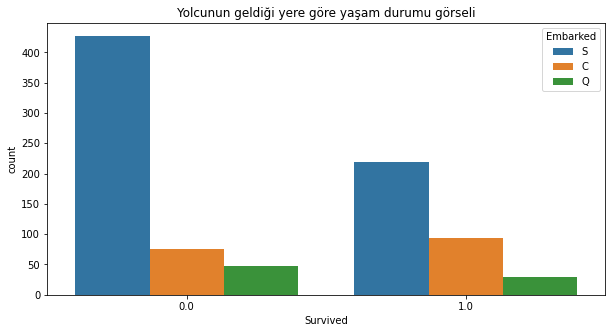

In [97]:
plt.figure(figsize=(10,5))
sns.countplot(df['Survived'],hue=df['Embarked'])
plt.title('Yolcunun geldiği yere göre yaşam durumu görseli')

#Feature Engineering

In [99]:
df["title"]=df["Name"].str.extract(" ([A-Za-z]+)\.",expand=False)
df["title"].value_counts()#      value_counts() important

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Lady          1
Capt          1
Dona          1
Don           1
Sir           1
Jonkheer      1
Mme           1
Countess      1
Name: title, dtype: int64

In [100]:
df['title']=df['title'].replace(['Jonkheer','Don','Sir','Major','Col','Dr','Rev','Capt'],'Mr')
df['title']=df['title'].replace(['Countess','Mme','Lady','Dona'],'Mrs')
df['title']=df['title'].replace(['Mlle','Ms'],'Mr')
df["title"].value_counts()

Mr        787
Miss      260
Mrs       201
Master     61
Name: title, dtype: int64

In [101]:
df['Family']=df['SibSp']+df['Parch']+1
df['Family']

0       2
1       2
2       1
3       2
4       1
       ..
1304    1
1305    1
1306    1
1307    1
1308    3
Name: Family, Length: 1309, dtype: int64

In [102]:
df['Large']=df['Family']>5
df['Medium']=(df['Family']==4)| (df['Family']==5)
df['Small']=(df['Family']==2) | (df['Family']==3)
df['Single']=df['Family']==1

df[['Large','Small','Single','Medium']]=df[['Large','Small','Single','Medium']].replace(True,1)

In [105]:
df.drop(['SibSp','Parch','Name'],axis=1,inplace=True)

In [108]:
df['Age'].fillna(df.groupby('title')['Age'].transform('median'),inplace=True)
# yaşı her bir ünvanın kendi içindeki medyanına göre doldurdum.

In [121]:
df['Cabin']=df['Cabin'].apply(lambda x: x[:1])

In [123]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,title,Family,Large,Medium,Small,Single
0,1,0.0,3,male,22.0,A/5 21171,7.2500,N,S,Mr,2,0.0,0.0,1.0,0.0
1,2,1.0,1,female,38.0,PC 17599,71.2833,C,C,Mrs,2,0.0,0.0,1.0,0.0
2,3,1.0,3,female,26.0,STON/O2. 3101282,7.9250,N,S,Miss,1,0.0,0.0,0.0,1.0
3,4,1.0,1,female,35.0,113803,53.1000,C,S,Mrs,2,0.0,0.0,1.0,0.0
4,5,0.0,3,male,35.0,373450,8.0500,N,S,Mr,1,0.0,0.0,0.0,1.0


In [127]:
Passenger=df['PassengerId']

In [125]:
df.drop(['Ticket','PassengerId'],axis=1,inplace=True)

In [129]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,Family,Large,Medium,Small,Single
0,0.0,3,male,22.0,7.2500,N,S,Mr,2,0.0,0.0,1.0,0.0
1,1.0,1,female,38.0,71.2833,C,C,Mrs,2,0.0,0.0,1.0,0.0
2,1.0,3,female,26.0,7.9250,N,S,Miss,1,0.0,0.0,0.0,1.0
3,1.0,1,female,35.0,53.1000,C,S,Mrs,2,0.0,0.0,1.0,0.0
4,0.0,3,male,35.0,8.0500,N,S,Mr,1,0.0,0.0,0.0,1.0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   Fare      1309 non-null   float64
 5   Cabin     1309 non-null   object 
 6   Embarked  1309 non-null   object 
 7   title     1309 non-null   object 
 8   Family    1309 non-null   int64  
 9   Large     1309 non-null   float64
 10  Medium    1309 non-null   float64
 11  Small     1309 non-null   float64
 12  Single    1309 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 133.1+ KB


In [141]:
train=df[:891]
test=df[891:]

In [251]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

Rfc=RandomForestClassifier()
Gbc=GradientBoostingClassifier()
Etc=ExtraTreeClassifier()
Dtc=DecisionTreeClassifier()
xgb=XGBClassifier()
Gb=GaussianNB()
Ber=BernoulliNB()
knn=KNeighborsClassifier()

models=[Rfc,Gbc,Dtc,Etc,xgb,Gb,Ber,knn]
models_name=['RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifier','ExtraTreeClassifier','XGBClassifier','GaussianNB','BernoulliNB','KNeighborsClassifier']
f1=[]
accu=[]

In [252]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [254]:
x=pn.get_dummies(x,drop_first=True)

In [256]:
x.drop('Cabin_T',axis=1,inplace=True)

In [257]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=14)

In [258]:
def fitting(x_train, x_test, y_train, y_test):
  for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    f1.append(f1_score(y_test,y_pred))
    accu.append(accuracy_score(y_test,y_pred))
  sonuc={'Modeller':models_name,'Accuracy_score':accu,'F1_score':f1}
  sonuc=pn.DataFrame(sonuc)
  return sonuc

In [259]:
sonuc=fitting(x_train, x_test, y_train, y_test)

In [260]:
sonuc

,Modeller,Accuracy_score,F1_score
0,RandomForestClassifier,0.809701,0.732984
1,GradientBoostingClassifier,0.824627,0.753927
2,DecisionTreeClassifier,0.764925,0.676923
3,ExtraTreeClassifier,0.742537,0.653266
4,XGBClassifier,0.828358,0.762887
5,GaussianNB,0.791045,0.750000
6,BernoulliNB,0.817164,0.767773
7,KNeighborsClassifier,0.708955,0.597938


In [261]:
test

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,Family,Large,Medium,Small,Single
891,NaN,3,male,34.5,7.8292,N,Q,Mr,1,0.0,0.0,0.0,1.0
892,NaN,3,female,47.0,7.0000,N,S,Mrs,2,0.0,0.0,1.0,0.0
893,NaN,2,male,62.0,9.6875,N,Q,Mr,1,0.0,0.0,0.0,1.0
894,NaN,3,male,27.0,8.6625,N,S,Mr,1,0.0,0.0,0.0,1.0
895,NaN,3,female,22.0,12.2875,N,S,Mrs,3,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,30.0,8.0500,N,S,Mr,1,0.0,0.0,0.0,1.0
1305,NaN,1,female,39.0,108.9000,C,C,Mrs,1,0.0,0.0,0.0,1.0
1306,NaN,3,male,38.5,7.2500,N,S,Mr,1,0.0,0.0,0.0,1.0
1307,NaN,3,male,30.0,8.0500,N,S,Mr,1,0.0,0.0,0.0,1.0


In [262]:
x_t=test.drop('Survived',axis=1)
y_t=test['Survived']

In [263]:
x_t=pn.get_dummies(x_t,drop_first=True)

In [265]:
sonuclar=xgb.predict(x_t)

In [272]:
passenger=Passenger[891:]

In [280]:
sonuclar=sonuclar.astype(int)

In [281]:
result=pn.DataFrame({'PassengerId':passenger,'Survived':sonuclar})

In [282]:
result

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [285]:
result.to_csv('titanic2.csv',index=False)